In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scanpy as sc
import scvelo as scv
scv.settings.verbosity = 0




import warnings
warnings.filterwarnings("ignore")

In [2]:
import sys
sys.path.append('/data/nelkazwi/code/UniTVelo-ATAC/unitvelo')
from supplement.fitting_genes_regions import average_over_intervals, compute_alpha_atac, region_unspliced_kinetics
from pl.pl import gene_weights_plots, get_scatter_markers, region_kinetic_plot,scatter_plot
from supplement.eval_utils import KNN_eval

In [3]:
scv.settings.verbosity = 3
scv.settings.presenter_view = True
scv.set_figure_params('scvelo')
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 200)
np.set_printoptions(suppress=True)

In [4]:
path_result = '/data/nelkazwi/code/UniTVelo-ATAC/notebooks/data/10X_mouse_brain_dataset/'
adata = sc.read_h5ad(path_result+"mouse_brain_adata.h5ad")
adata_atac = sc.read_h5ad(path_result+"mouse_brain_adata_atac.h5ad")
adata_unv = sc.read_h5ad(path_result+'mouse_brain_adata_unitvelo.h5ad')
B = np.loadtxt(path_result+'B.txt', delimiter=',')
key_celltype = 'celltype'

In [7]:
adata_mv = sc.read_h5ad(
    '/data/nelkazwi/RNA_velo/Unitvelo_atac/E18_mouse_brain_10X/Multivelo_mouse_brain_demo/multivelo_result_2.h5ad')

key_celltype_mv = 'celltype'

computing velocity graph (using 1/112 cores)


  0%|          | 0/3365 [00:00<?, ?cells/s]

    finished (0:00:06) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


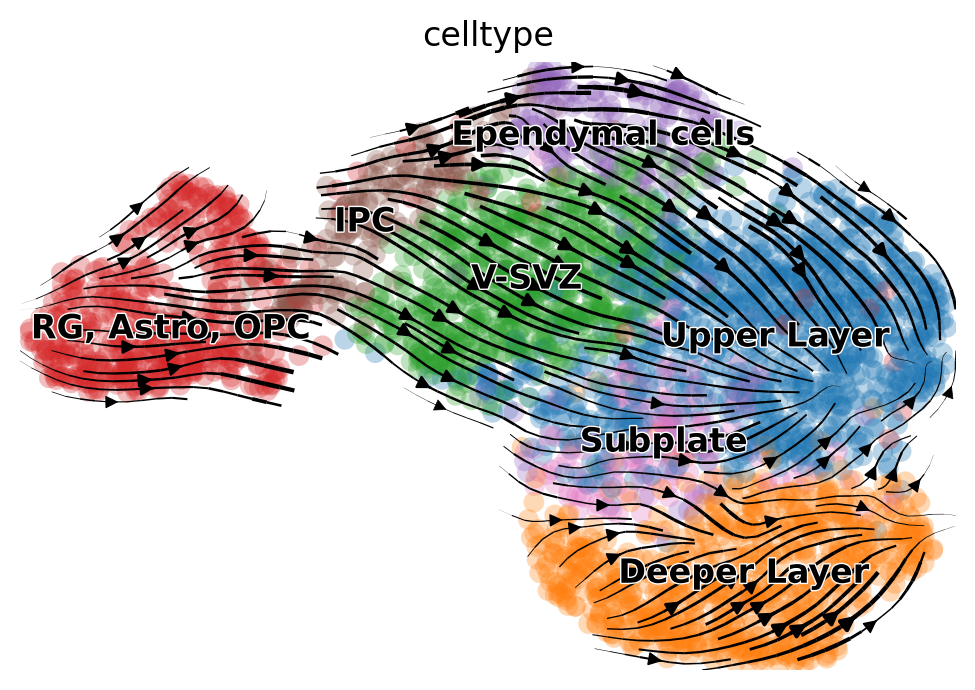

In [26]:
scv.tl.velocity_graph(adata)
scv.pl.velocity_embedding_stream(adata, color=['celltype'], dpi=100,
                                  color_map='gnuplot')

computing velocity graph (using 1/112 cores)


  0%|          | 0/3365 [00:00<?, ?cells/s]

    finished (0:00:06) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


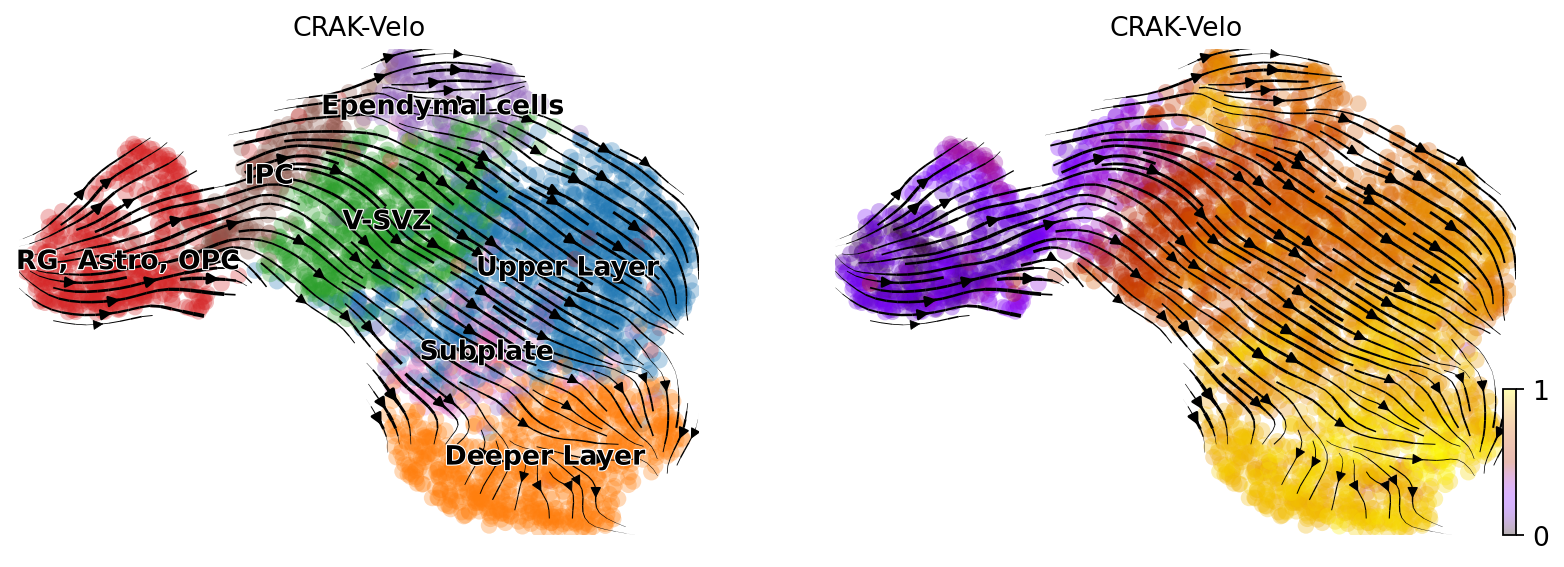

In [19]:
scv.tl.velocity_graph(adata_unv)
scv.pl.velocity_embedding_stream(adata_unv, color=['celltype', "latent_time"], dpi=100, color_map='gnuplot')

In [16]:
alpha_atac, adata = compute_alpha_atac(adata, adata_atac, B)


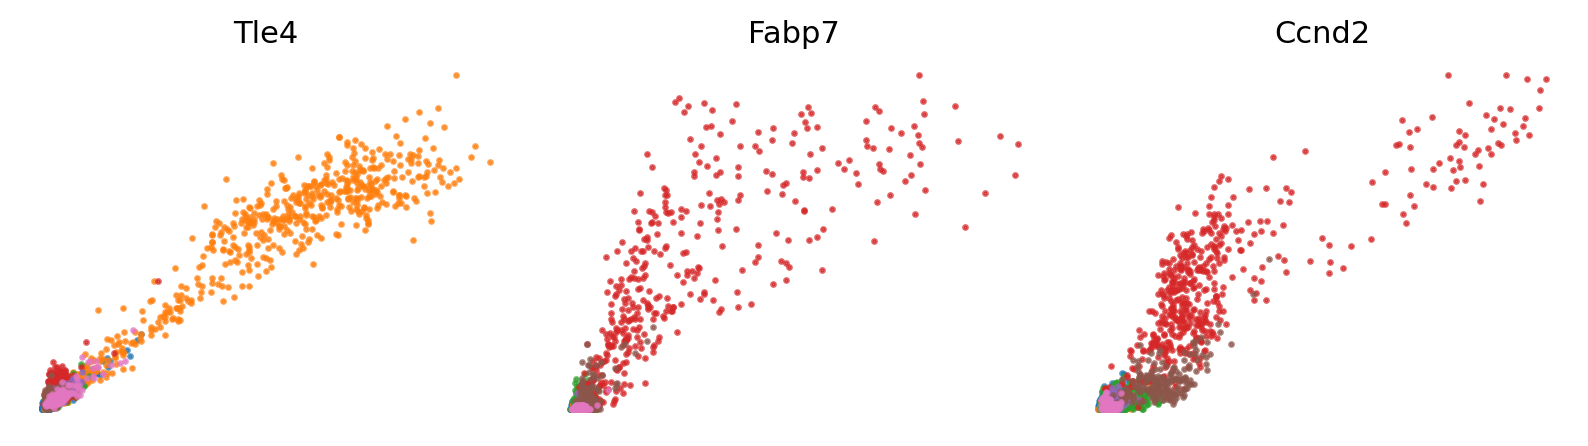

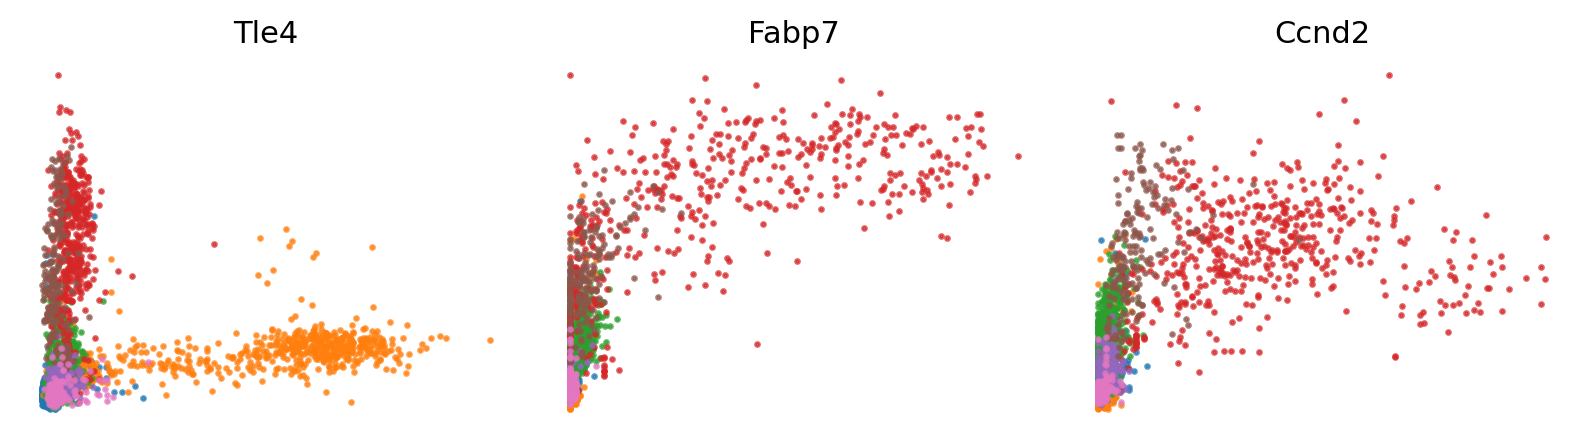

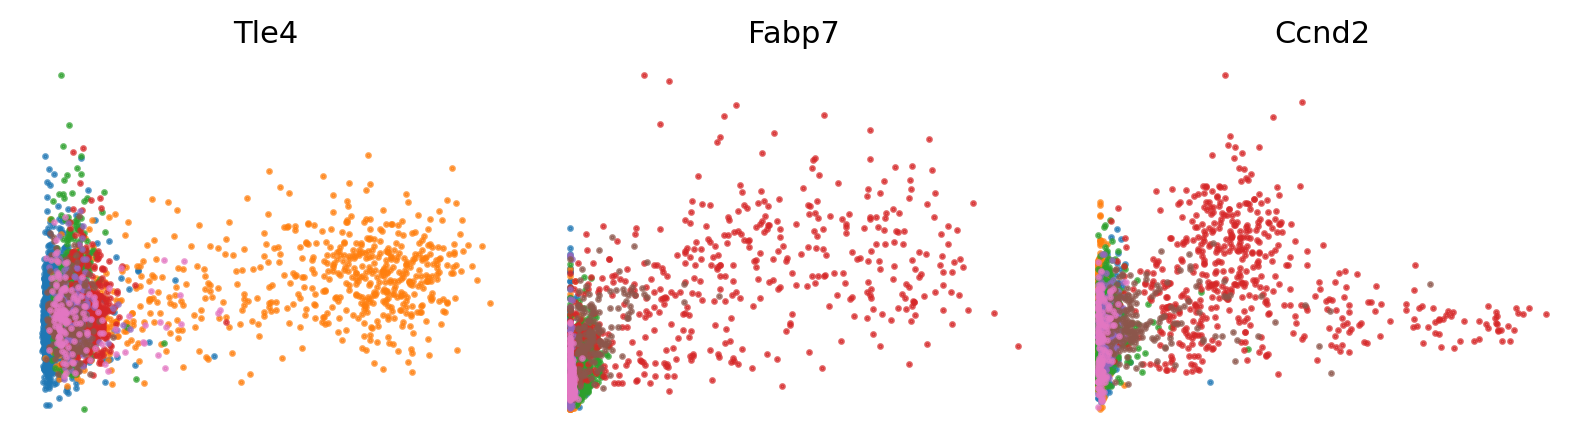

In [17]:
gene_list = ['Tle4','Fabp7','Ccnd2']


scatter_plot(adata, gene_list, color_by=key_celltype, by='us',  axis_on=False, frame_on=False)



scatter_plot(adata, gene_list, color_by=key_celltype, by='cu',  axis_on=False, frame_on=False)


scatter_plot(adata_mv, genes=gene_list, color_by=key_celltype_mv, by='cu', axis_on=False, frame_on=False)

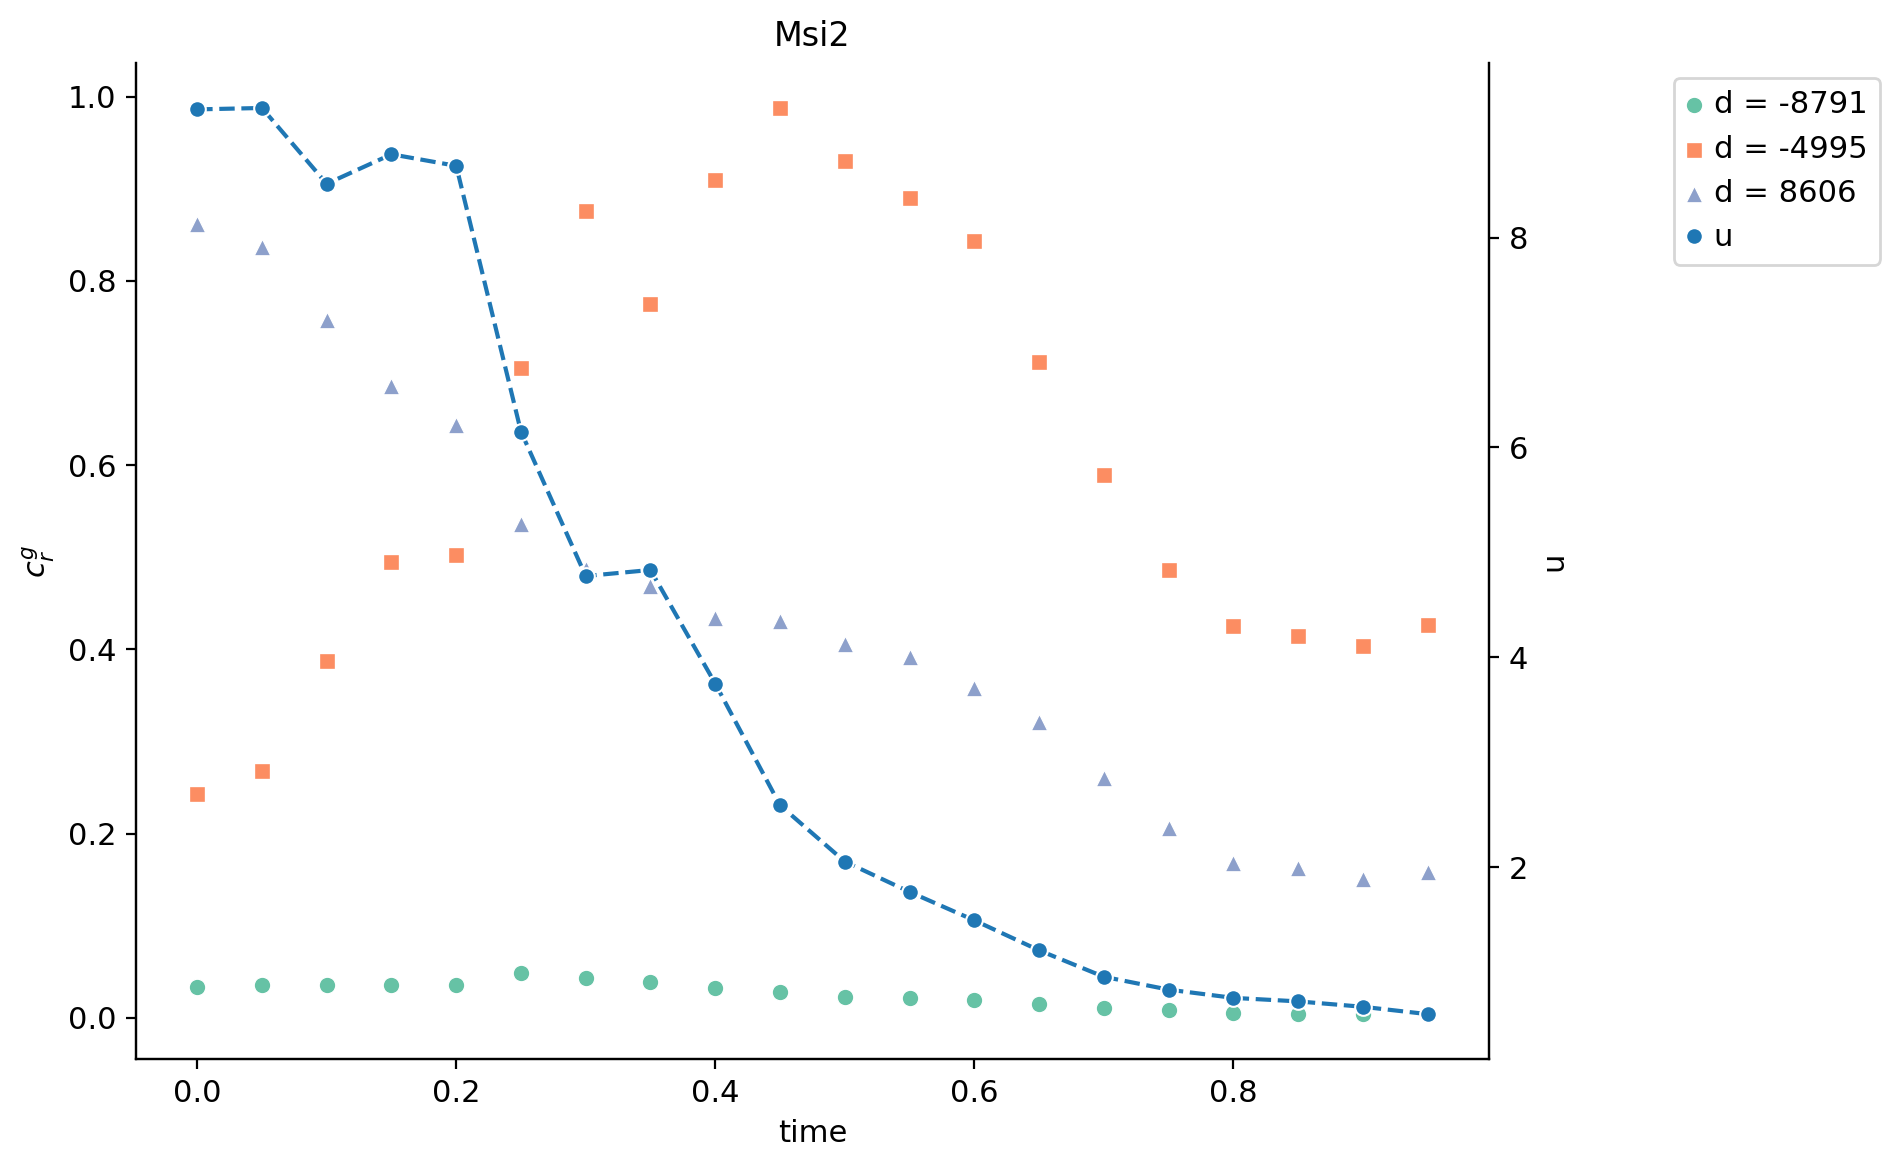

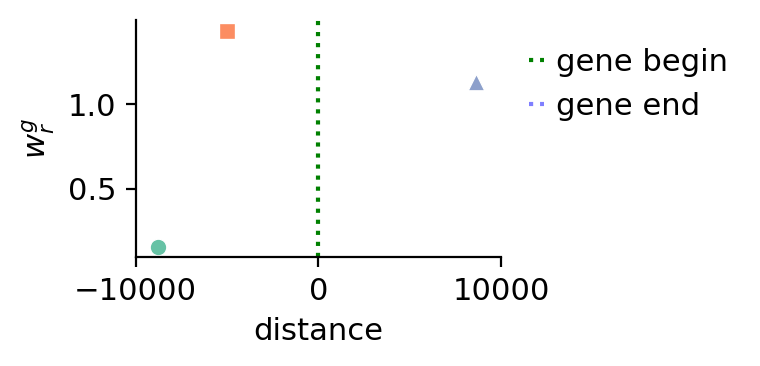

In [31]:
gene_name = 'Msi2'
time, c, u_avg = region_unspliced_kinetics(adata, adata_atac, B, gene_name, interval = 0.05)
region_kinetic_plot(adata,adata_atac,gene_name, time, c, u_avg,B)

In [32]:
acc, acc_mv, acc_su = KNN_eval (adata, adata_mv, key_celltype, key_celltype_mv)

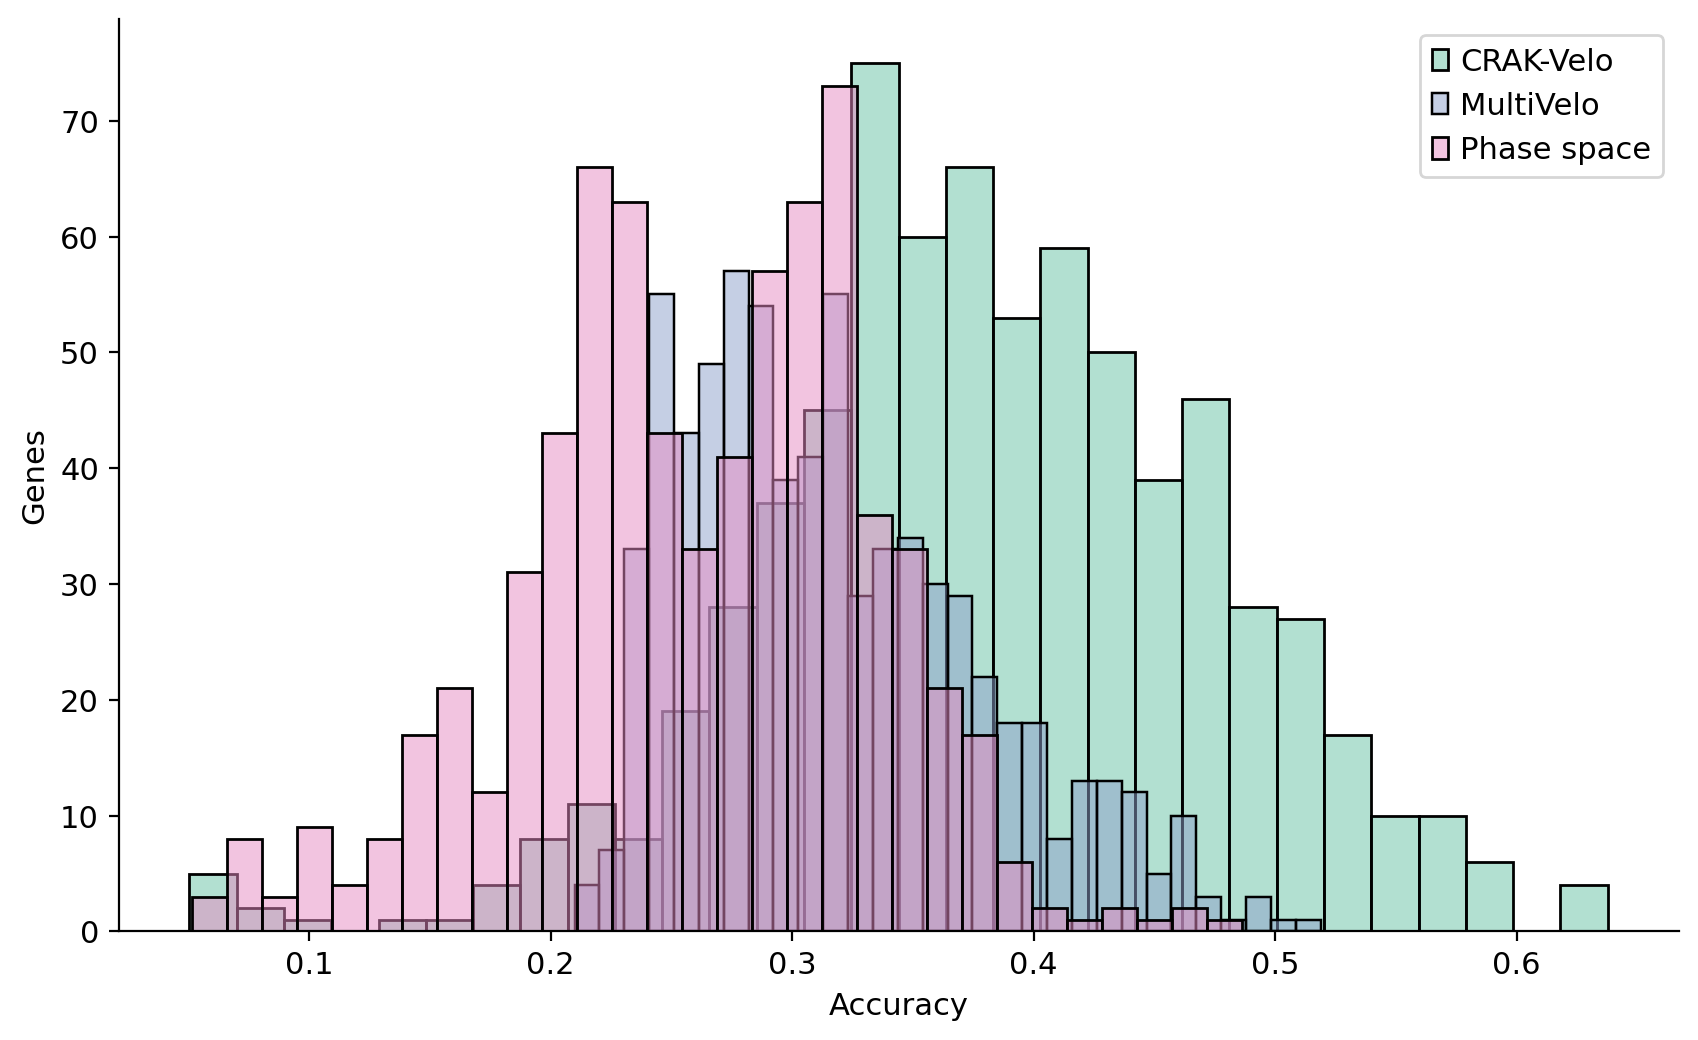

In [33]:
bins=30
alpha=0.5

colors = plt.get_cmap('Set2').colors
labels = ['CRAK-Velo', 'MultiVelo', 'Phase space']#
plt.figure(figsize=(10, 6))
n = 0
sns.histplot(acc, bins=bins, color=colors[n], label=labels[0], alpha=alpha, kde=False)
sns.histplot(acc_mv, bins=bins, color=colors[n+2], label=labels[1], alpha=alpha, kde=False)
plot = sns.histplot(acc_su, bins=bins, color=colors[n+3], label=labels[2], alpha=alpha, kde=False)
plot.spines['top'].set_visible(False)
plot.spines['right'].set_visible(False)
plt.ylabel("Genes")
plt.xlabel("Accuracy")
plt.legend()


In [ ]:
# import sys
# import importlib

# # Clear the module from cache
# sys.modules.pop('pl.pl', None)

# # Reload the module
# importlib.import_module('pl.pl')

# sys.modules.pop('supplement.fitting_genes_regions', None)

# # Reload the module
# importlib.import_module('supplement.fitting_genes_regions')


# from pl.pl import gene_weights_plots, region_kinetic_plot
# from supplement.fitting_genes_regions import compute_alpha_atac, region_unspliced_kinetics

# %load_ext autoreload
# %autoreload 2